##    
# Prediction Of Survivability of Children undergoing HSCT - Experiment II
##   

###  
## Importing Required Libraries
###  

In [71]:
!pip install xgboost

In [72]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

plt.style.use('dark_background')

import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from xgboost import XGBClassifier

###  
## Reading CSV File (Dataset)
###  

In [73]:
df = pd.read_csv("C:/rishabh's space/IIIT BHAGALPUR M.TECH/Course Work Assignments and Various Files/FInal Year project/major project 1/dataset.csv")
df.head()

,donor_age,donor_age_below_35,donor_ABO,donor_CMV,recipient_age,recipient_age_below_10,recipient_age_int,recipient_gender,recipient_body_mass,recipient_ABO,...,CD3_to_CD34_ratio,ANC_recovery,PLT_recovery,acute_GvHD_II_III_IV,acute_GvHD_III_IV,time_to_acute_GvHD_III_IV,extensive_chronic_GvHD,relapse,survival_time,survival_status
0,22.830137,yes,A,present,9.6,yes,5_10,male,35,A,...,1.33876,19,51,yes,yes,32,no,no,999,0
1,23.342466,yes,B,absent,4.0,yes,0_5,male,20.6,B,...,11.078295,16,37,yes,no,1000000,no,yes,163,1
2,26.394521,yes,B,absent,6.6,yes,5_10,male,23.4,B,...,19.01323,23,20,yes,no,1000000,no,yes,435,1
3,39.684932,no,A,present,18.1,no,10_20,female,50,AB,...,29.481647,23,29,yes,yes,19,?,no,53,1
4,33.358904,yes,A,absent,1.3,yes,0_5,female,9,AB,...,3.972255,14,14,no,no,1000000,no,no,2043,0


## Info about dataset

### Size of Dataset

In [74]:
df.shape

(187, 37)

### Info about features

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   donor_age                  187 non-null    float64
 1   donor_age_below_35         187 non-null    object 
 2   donor_ABO                  187 non-null    object 
 3   donor_CMV                  187 non-null    object 
 4   recipient_age              187 non-null    float64
 5   recipient_age_below_10     187 non-null    object 
 6   recipient_age_int          187 non-null    object 
 7   recipient_gender           187 non-null    object 
 8   recipient_body_mass        187 non-null    object 
 9   recipient_ABO              187 non-null    object 
 10  recipient_rh               187 non-null    object 
 11  recipient_CMV              187 non-null    object 
 12  disease                    187 non-null    object 
 13  disease_group              187 non-null    object 

### Checking NULL values

In [76]:
df.isna().sum()

donor_age                    0
donor_age_below_35           0
donor_ABO                    0
donor_CMV                    0
recipient_age                0
recipient_age_below_10       0
recipient_age_int            0
recipient_gender             0
recipient_body_mass          0
recipient_ABO                0
recipient_rh                 0
recipient_CMV                0
disease                      0
disease_group                0
gender_match                 0
ABO_match                    0
CMV_status                   0
HLA_match                    0
HLA_mismatch                 0
antigen                      0
allel                        0
HLA_group_1                  0
risk_group                   0
stem_cell_source             0
tx_post_relapse              0
CD34_x1e6_per_kg             0
CD3_x1e8_per_kg              0
CD3_to_CD34_ratio            0
ANC_recovery                 0
PLT_recovery                 0
acute_GvHD_II_III_IV         0
acute_GvHD_III_IV            0
time_to_

### Checking number of unique values for object type features

In [77]:
{column: len(df[column].unique()) for column in df.select_dtypes('object').columns}

{'donor_age_below_35': 2,
 'donor_ABO': 4,
 'donor_CMV': 3,
 'recipient_age_below_10': 2,
 'recipient_age_int': 3,
 'recipient_gender': 2,
 'recipient_body_mass': 131,
 'recipient_ABO': 5,
 'recipient_rh': 3,
 'recipient_CMV': 3,
 'disease': 5,
 'disease_group': 2,
 'gender_match': 2,
 'ABO_match': 3,
 'CMV_status': 5,
 'HLA_match': 4,
 'HLA_mismatch': 2,
 'antigen': 5,
 'allel': 6,
 'HLA_group_1': 7,
 'risk_group': 2,
 'stem_cell_source': 2,
 'tx_post_relapse': 2,
 'CD3_x1e8_per_kg': 164,
 'CD3_to_CD34_ratio': 183,
 'acute_GvHD_II_III_IV': 2,
 'acute_GvHD_III_IV': 2,
 'extensive_chronic_GvHD': 3,
 'relapse': 2}

### Listing of unique values for object type features

In [78]:
{column: list(df[column].unique()) for column in df.select_dtypes('object').columns}

{'donor_age_below_35': ['yes', 'no'],
 'donor_ABO': ['A', 'B', 'AB', '0'],
 'donor_CMV': ['present', 'absent', '?'],
 'recipient_age_below_10': ['yes', 'no'],
 'recipient_age_int': ['5_10', '0_5', '10_20'],
 'recipient_gender': ['male', 'female'],
 'recipient_body_mass': ['35',
  '20.6',
  '23.4',
  '50',
  '9',
  '40',
  '51',
  '56',
  '20.5',
  '16.5',
  '10.5',
  '47',
  '18.1',
  '42',
  '55',
  '30',
  '97.8',
  '6',
  '64',
  '62',
  '43.2',
  '31',
  '39.3',
  '23.8',
  '26.8',
  '6.4',
  '17',
  '14.3',
  '38.3',
  '20',
  '23',
  '15',
  '49.6',
  '10',
  '11.25',
  '63',
  '43.5',
  '48',
  '15.3',
  '29',
  '41.4',
  '76',
  '34.1',
  '60.4',
  '48.8',
  '38.5',
  '28.5',
  '7.5',
  '19.5',
  '8.15',
  '14',
  '37',
  '13',
  '68',
  '52',
  '61',
  '54.9',
  '11.9',
  '49',
  '30.8',
  '45.5',
  '46.7',
  '58',
  '56.5',
  '16',
  '26.5',
  '28',
  '26',
  '37.5',
  '44.3',
  '43',
  '61.3',
  '14.1',
  '34',
  '62.5',
  '11.2',
  '72.5',
  '24.5',
  '70',
  '?',
  '22.6',

## Pre-Processing

### Selecting features having object type as their datatype

In [79]:
columns=df.select_dtypes('object').columns

### Listing out the features having object datatype

In [80]:
columns

Index(['donor_age_below_35', 'donor_ABO', 'donor_CMV',
       'recipient_age_below_10', 'recipient_age_int', 'recipient_gender',
       'recipient_body_mass', 'recipient_ABO', 'recipient_rh', 'recipient_CMV',
       'disease', 'disease_group', 'gender_match', 'ABO_match', 'CMV_status',
       'HLA_match', 'HLA_mismatch', 'antigen', 'allel', 'HLA_group_1',
       'risk_group', 'stem_cell_source', 'tx_post_relapse', 'CD3_x1e8_per_kg',
       'CD3_to_CD34_ratio', 'acute_GvHD_II_III_IV', 'acute_GvHD_III_IV',
       'extensive_chronic_GvHD', 'relapse'],
      dtype='object')

### Missing value replace

In [81]:
avg_list=['recipient_body_mass','CD3_x1e8_per_kg','CD3_to_CD34_ratio']

In [82]:
quest_column=[]
for i in columns:
    if '?' in df[i].unique() and i not in avg_list:
        quest_column.append(i)

In [83]:
quest_column

['donor_CMV',
 'recipient_ABO',
 'recipient_rh',
 'recipient_CMV',
 'ABO_match',
 'CMV_status',
 'antigen',
 'allel',
 'extensive_chronic_GvHD']

In [84]:
def questionmark_replace(x):
    if x == '?':
        return rep_value
    else: return x

In [85]:
for i in quest_column:
    rep_value=list(df[i].mode())[0]
    df[i] = df[i].apply(questionmark_replace)

In [86]:
for i in avg_list:
    df_new=df[df[i] != '?']

In [87]:
for i in avg_list:
    rep_value=df_new[i].median()
    df[i] = df[i].apply(questionmark_replace)

### Checking number of unique values for object type features (checking removal of '?' as value)

In [88]:
{column: len(df[column].unique()) for column in df.select_dtypes('object').columns}

{'donor_age_below_35': 2,
 'donor_ABO': 4,
 'donor_CMV': 2,
 'recipient_age_below_10': 2,
 'recipient_age_int': 3,
 'recipient_gender': 2,
 'recipient_body_mass': 131,
 'recipient_ABO': 4,
 'recipient_rh': 2,
 'recipient_CMV': 2,
 'disease': 5,
 'disease_group': 2,
 'gender_match': 2,
 'ABO_match': 2,
 'CMV_status': 4,
 'HLA_match': 4,
 'HLA_mismatch': 2,
 'antigen': 4,
 'allel': 5,
 'HLA_group_1': 7,
 'risk_group': 2,
 'stem_cell_source': 2,
 'tx_post_relapse': 2,
 'CD3_x1e8_per_kg': 164,
 'CD3_to_CD34_ratio': 183,
 'acute_GvHD_II_III_IV': 2,
 'acute_GvHD_III_IV': 2,
 'extensive_chronic_GvHD': 2,
 'relapse': 2}

### Listing of unique values for object type features (checking removal of '?' as value)

In [89]:
{column: list(df[column].unique()) for column in df.select_dtypes('object').columns}

{'donor_age_below_35': ['yes', 'no'],
 'donor_ABO': ['A', 'B', 'AB', '0'],
 'donor_CMV': ['present', 'absent'],
 'recipient_age_below_10': ['yes', 'no'],
 'recipient_age_int': ['5_10', '0_5', '10_20'],
 'recipient_gender': ['male', 'female'],
 'recipient_body_mass': ['35',
  '20.6',
  '23.4',
  '50',
  '9',
  '40',
  '51',
  '56',
  '20.5',
  '16.5',
  '10.5',
  '47',
  '18.1',
  '42',
  '55',
  '30',
  '97.8',
  '6',
  '64',
  '62',
  '43.2',
  '31',
  '39.3',
  '23.8',
  '26.8',
  '6.4',
  '17',
  '14.3',
  '38.3',
  '20',
  '23',
  '15',
  '49.6',
  '10',
  '11.25',
  '63',
  '43.5',
  '48',
  '15.3',
  '29',
  '41.4',
  '76',
  '34.1',
  '60.4',
  '48.8',
  '38.5',
  '28.5',
  '7.5',
  '19.5',
  '8.15',
  '14',
  '37',
  '13',
  '68',
  '52',
  '61',
  '54.9',
  '11.9',
  '49',
  '30.8',
  '45.5',
  '46.7',
  '58',
  '56.5',
  '16',
  '26.5',
  '28',
  '26',
  '37.5',
  '44.3',
  '43',
  '61.3',
  '14.1',
  '34',
  '62.5',
  '11.2',
  '72.5',
  '24.5',
  '70',
  33.0,
  '22.6',
  '

### Creating a custom function to convert datatype for features having numerical type values

In [90]:
def type_covertor(x):
    if x == '?':
        return 0
    else: return float(x)
   

### Converting values from object to numerical type

In [91]:
df['recipient_body_mass'] = df['recipient_body_mass'].apply(type_covertor)

### Checking the change of datatype for the feature

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   donor_age                  187 non-null    float64
 1   donor_age_below_35         187 non-null    object 
 2   donor_ABO                  187 non-null    object 
 3   donor_CMV                  187 non-null    object 
 4   recipient_age              187 non-null    float64
 5   recipient_age_below_10     187 non-null    object 
 6   recipient_age_int          187 non-null    object 
 7   recipient_gender           187 non-null    object 
 8   recipient_body_mass        187 non-null    float64
 9   recipient_ABO              187 non-null    object 
 10  recipient_rh               187 non-null    object 
 11  recipient_CMV              187 non-null    object 
 12  disease                    187 non-null    object 
 13  disease_group              187 non-null    object 

### Converting values from object to numerical type

In [93]:
df['CD3_x1e8_per_kg'] = df['CD3_x1e8_per_kg'].apply(type_covertor)

### Checking the change of datatype for the feature

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   donor_age                  187 non-null    float64
 1   donor_age_below_35         187 non-null    object 
 2   donor_ABO                  187 non-null    object 
 3   donor_CMV                  187 non-null    object 
 4   recipient_age              187 non-null    float64
 5   recipient_age_below_10     187 non-null    object 
 6   recipient_age_int          187 non-null    object 
 7   recipient_gender           187 non-null    object 
 8   recipient_body_mass        187 non-null    float64
 9   recipient_ABO              187 non-null    object 
 10  recipient_rh               187 non-null    object 
 11  recipient_CMV              187 non-null    object 
 12  disease                    187 non-null    object 
 13  disease_group              187 non-null    object 

### Converting values from object to numerical type

In [95]:
df['CD3_to_CD34_ratio'] = df['CD3_to_CD34_ratio'].apply(type_covertor)

### Checking the change of datatype for the feature

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   donor_age                  187 non-null    float64
 1   donor_age_below_35         187 non-null    object 
 2   donor_ABO                  187 non-null    object 
 3   donor_CMV                  187 non-null    object 
 4   recipient_age              187 non-null    float64
 5   recipient_age_below_10     187 non-null    object 
 6   recipient_age_int          187 non-null    object 
 7   recipient_gender           187 non-null    object 
 8   recipient_body_mass        187 non-null    float64
 9   recipient_ABO              187 non-null    object 
 10  recipient_rh               187 non-null    object 
 11  recipient_CMV              187 non-null    object 
 12  disease                    187 non-null    object 
 13  disease_group              187 non-null    object 

### Listing of unique values for object type features (checking for the remaining object type features)

In [97]:
{column: list(df[column].unique()) for column in df.select_dtypes('object').columns}

{'donor_age_below_35': ['yes', 'no'],
 'donor_ABO': ['A', 'B', 'AB', '0'],
 'donor_CMV': ['present', 'absent'],
 'recipient_age_below_10': ['yes', 'no'],
 'recipient_age_int': ['5_10', '0_5', '10_20'],
 'recipient_gender': ['male', 'female'],
 'recipient_ABO': ['A', 'B', 'AB', '0'],
 'recipient_rh': ['plus', 'minus'],
 'recipient_CMV': ['present', 'absent'],
 'disease': ['ALL', 'AML', 'chronic', 'nonmalignant', 'lymphoma'],
 'disease_group': ['malignant', 'nonmalignant'],
 'gender_match': ['other', 'female_to_male'],
 'ABO_match': ['matched', 'mismatched'],
 'CMV_status': ['3', '0', '2', '1'],
 'HLA_match': ['10/10', '9/10', '7/10', '8/10'],
 'HLA_mismatch': ['matched', 'mismatched'],
 'antigen': ['0', '2', '1', '3'],
 'allel': ['0', '1', '3', '2', '4'],
 'HLA_group_1': ['matched',
  'one_antigen',
  'mismatched',
  'DRB1_cell',
  'one_allel',
  'two_diffs',
  'three_diffs'],
 'risk_group': ['high', 'low'],
 'stem_cell_source': ['peripheral_blood', 'bone_marrow'],
 'tx_post_relapse': [

## Encoding

In [98]:
x= {column: len(df[column].unique()) == 2 for column in df.select_dtypes('object').columns}

### Selecting features having binary type values

In [99]:
binary=[]
for i in x:
    if x[i] == True:
        binary.append(i)

In [100]:
binary

['donor_age_below_35',
 'donor_CMV',
 'recipient_age_below_10',
 'recipient_gender',
 'recipient_rh',
 'recipient_CMV',
 'disease_group',
 'gender_match',
 'ABO_match',
 'HLA_mismatch',
 'risk_group',
 'stem_cell_source',
 'tx_post_relapse',
 'acute_GvHD_II_III_IV',
 'acute_GvHD_III_IV',
 'extensive_chronic_GvHD',
 'relapse']

### Binary encoding

In [101]:
def encode_binary(x):
    if x == 'no':
        return 0
    elif x == 'yes':
        return 1
    elif x =="present":
        return 1
    elif x =='absent':
        return 0
    elif x =="female":
        return 0
    elif x =='male':
        return 1
    elif x =="minus":
        return 0
    elif x =='plus':
        return 1
    elif x =="nonmalignant":
        return 0
    elif x =='malignant':
        return 1
    elif x =="other":
        return 0
    elif x =='female_to_male':
        return 1
    elif x =="mismatched":
        return 0
    elif x =='matched':
        return 1
    elif x =="low":
        return 0
    elif x =='high':
        return 1
    elif x =="peripheral_blood":
        return 0
    elif x =='bone_marrow':
        return 1

In [102]:
for i in binary:
    df[i] = df[i].apply(encode_binary)

### Checking the change of datatype for the feature

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   donor_age                  187 non-null    float64
 1   donor_age_below_35         187 non-null    int64  
 2   donor_ABO                  187 non-null    object 
 3   donor_CMV                  187 non-null    int64  
 4   recipient_age              187 non-null    float64
 5   recipient_age_below_10     187 non-null    int64  
 6   recipient_age_int          187 non-null    object 
 7   recipient_gender           187 non-null    int64  
 8   recipient_body_mass        187 non-null    float64
 9   recipient_ABO              187 non-null    object 
 10  recipient_rh               187 non-null    int64  
 11  recipient_CMV              187 non-null    int64  
 12  disease                    187 non-null    object 
 13  disease_group              187 non-null    int64  

### Listing of unique values for object type features (checking for the remaining object type features)

In [104]:
{column: list(df[column].unique()) for column in df.select_dtypes('object').columns}

{'donor_ABO': ['A', 'B', 'AB', '0'],
 'recipient_age_int': ['5_10', '0_5', '10_20'],
 'recipient_ABO': ['A', 'B', 'AB', '0'],
 'disease': ['ALL', 'AML', 'chronic', 'nonmalignant', 'lymphoma'],
 'CMV_status': ['3', '0', '2', '1'],
 'HLA_match': ['10/10', '9/10', '7/10', '8/10'],
 'antigen': ['0', '2', '1', '3'],
 'allel': ['0', '1', '3', '2', '4'],
 'HLA_group_1': ['matched',
  'one_antigen',
  'mismatched',
  'DRB1_cell',
  'one_allel',
  'two_diffs',
  'three_diffs']}

### Selecting features having nominal type values

In [105]:
nominal=['donor_ABO','recipient_ABO','disease','HLA_group_1']

### Selecting features having ordinal type values

In [106]:
ordinal=['recipient_age_int','HLA_match']

### Selecting features having numerical type values

In [107]:
numercical=['CMV_status','antigen','allel']

### Custom function for converting datatype to numerical type

In [108]:
def int_type_covertor(x):
    if x == '?':
        return 0
    else: return int(x)
   

### Converting values from object to numerical type

In [109]:
for i in numercical:
    df[i] = df[i].apply(int_type_covertor)

### Checking the change of datatype for the feature

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 37 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   donor_age                  187 non-null    float64
 1   donor_age_below_35         187 non-null    int64  
 2   donor_ABO                  187 non-null    object 
 3   donor_CMV                  187 non-null    int64  
 4   recipient_age              187 non-null    float64
 5   recipient_age_below_10     187 non-null    int64  
 6   recipient_age_int          187 non-null    object 
 7   recipient_gender           187 non-null    int64  
 8   recipient_body_mass        187 non-null    float64
 9   recipient_ABO              187 non-null    object 
 10  recipient_rh               187 non-null    int64  
 11  recipient_CMV              187 non-null    int64  
 12  disease                    187 non-null    object 
 13  disease_group              187 non-null    int64  

### One-Hot Encoding for features have ordinal type values

In [111]:
for i in ordinal:
    df = pd.get_dummies(df, prefix=[i], columns=[i])

### Checking the new size of dataframes (Increasae in number of features due to One-Hot Encoding)

In [112]:
df.shape

(187, 42)

### Checking the change of datatype for the feature

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 42 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   donor_age                  187 non-null    float64
 1   donor_age_below_35         187 non-null    int64  
 2   donor_ABO                  187 non-null    object 
 3   donor_CMV                  187 non-null    int64  
 4   recipient_age              187 non-null    float64
 5   recipient_age_below_10     187 non-null    int64  
 6   recipient_gender           187 non-null    int64  
 7   recipient_body_mass        187 non-null    float64
 8   recipient_ABO              187 non-null    object 
 9   recipient_rh               187 non-null    int64  
 10  recipient_CMV              187 non-null    int64  
 11  disease                    187 non-null    object 
 12  disease_group              187 non-null    int64  
 13  gender_match               187 non-null    int64  

### One-Hot Encoding for features have nominal type values

In [114]:
for i in nominal:
    df = pd.get_dummies(df, prefix=[i], columns=[i])

### Checking the new size of dataframes (Increasae in number of features due to One-Hot Encoding)

In [115]:
df.shape

(187, 58)

### Checking the change of datatype for the feature

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   donor_age                  187 non-null    float64
 1   donor_age_below_35         187 non-null    int64  
 2   donor_CMV                  187 non-null    int64  
 3   recipient_age              187 non-null    float64
 4   recipient_age_below_10     187 non-null    int64  
 5   recipient_gender           187 non-null    int64  
 6   recipient_body_mass        187 non-null    float64
 7   recipient_rh               187 non-null    int64  
 8   recipient_CMV              187 non-null    int64  
 9   disease_group              187 non-null    int64  
 10  gender_match               187 non-null    int64  
 11  ABO_match                  187 non-null    int64  
 12  CMV_status                 187 non-null    int64  
 13  HLA_mismatch               187 non-null    int64  

###  
## Model Building
###  

In [117]:
x = df.drop(['survival_status'], axis = 1)
y = df['survival_status'].astype(int)

###  
### Splitting the dataset into train:80% and test:20%
###  

In [118]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0 , test_size = 0.2)

In [119]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

###  
### Lists to hold the values to be printed
###  

In [120]:
accuracy_comp = []

In [121]:
precision_comp = []

In [122]:
recall_comp = []

In [123]:
f1score_comp = []

## Models/Algorithms

###  
## Logistic Regression
###  

In [124]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
predictions = lr.predict(x_test)

print('Confusion Matrix:\n',confusion_matrix(y_test, predictions))
print('\nClassification Report:\n\n',classification_report(y_test, predictions))
acc = accuracy_score(y_test, predictions)
prec = precision_score(y_test, predictions)
rec = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
acc_perc = np.round(acc*100, 2)
print('\nAccuracy=',str(acc_perc)+'%')

accuracy_comp.append(acc_perc)
precision_comp.append(prec)
recall_comp.append(rec)
f1score_comp.append(f1)

Confusion Matrix:
 [[17  2]
 [ 2 17]]

Classification Report:

               precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.89      0.89      0.89        19

    accuracy                           0.89        38
   macro avg       0.89      0.89      0.89        38
weighted avg       0.89      0.89      0.89        38


Accuracy= 89.47%


###  
## Decision Tree Classifier
###  

In [125]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
predictions = dt.predict(x_test)

print('Confusion Matrix:\n',confusion_matrix(y_test, predictions))
print('\nClassification Report:\n\n',classification_report(y_test, predictions))
acc = accuracy_score(y_test, predictions)
prec = precision_score(y_test, predictions)
rec = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
acc_perc = np.round(acc*100, 2)
print('\nAccuracy=',str(acc_perc)+'%')

accuracy_comp.append(acc_perc)
precision_comp.append(prec)
recall_comp.append(rec)
f1score_comp.append(f1)

Confusion Matrix:
 [[17  2]
 [ 1 18]]

Classification Report:

               precision    recall  f1-score   support

           0       0.94      0.89      0.92        19
           1       0.90      0.95      0.92        19

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38


Accuracy= 92.11%


###  
## Random Forest Classifier
###  

In [126]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predictions = rf.predict(x_test)

print('Confusion Matrix:\n',confusion_matrix(y_test, predictions))
print('\nClassification Report:\n\n',classification_report(y_test, predictions))
acc = accuracy_score(y_test, predictions)
prec = precision_score(y_test, predictions)
rec = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
acc_perc = np.round(acc*100, 2)
print('\nAccuracy=',str(acc_perc)+'%')

accuracy_comp.append(acc_perc)
precision_comp.append(prec)
recall_comp.append(rec)
f1score_comp.append(f1)

Confusion Matrix:
 [[19  0]
 [ 2 17]]

Classification Report:

               precision    recall  f1-score   support

           0       0.90      1.00      0.95        19
           1       1.00      0.89      0.94        19

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38


Accuracy= 94.74%


###  
## XGBoost
###  

In [127]:
import xgboost as xgb
xgb = xgb.XGBClassifier()
xgb.fit(x_train, y_train)
pred = xgb.predict(x_test)
acc = accuracy_score(y_test, predictions)

print('Confusion Matrix:\n',confusion_matrix(y_test, predictions))
print('\nClassification Report:\n\n',classification_report(y_test, predictions))
acc = accuracy_score(y_test, predictions)
prec = precision_score(y_test, predictions)
rec = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
acc_perc = np.round(acc*100, 2)
print('\nAccuracy=',str(acc_perc)+'%')

accuracy_comp.append(acc_perc)
precision_comp.append(prec)
recall_comp.append(rec)
f1score_comp.append(f1)

Confusion Matrix:
 [[19  0]
 [ 2 17]]

Classification Report:

               precision    recall  f1-score   support

           0       0.90      1.00      0.95        19
           1       1.00      0.89      0.94        19

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38


Accuracy= 94.74%


###  
## KNN
###  

In [128]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
predictions = knn.predict(x_test)

print('Confusion Matrix:\n',confusion_matrix(y_test, predictions))
print('\nClassification Report:\n\n',classification_report(y_test, predictions))
acc = accuracy_score(y_test, predictions)
prec = precision_score(y_test, predictions)
rec = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
acc_perc = np.round(acc*100, 2)
print('\nAccuracy=',str(acc_perc)+'%')

accuracy_comp.append(acc_perc)
precision_comp.append(prec)
recall_comp.append(rec)
f1score_comp.append(f1)

Confusion Matrix:
 [[17  2]
 [ 2 17]]

Classification Report:

               precision    recall  f1-score   support

           0       0.89      0.89      0.89        19
           1       0.89      0.89      0.89        19

    accuracy                           0.89        38
   macro avg       0.89      0.89      0.89        38
weighted avg       0.89      0.89      0.89        38


Accuracy= 89.47%


###  
## Naive Bayes - Bernoulli
###  

In [129]:
from sklearn.naive_bayes import BernoulliNB
nbb = BernoulliNB()
nbb.fit(x_train, y_train)
predictions = nbb.predict(x_test)

print('Confusion Matrix:\n',confusion_matrix(y_test, predictions))
print('\nClassification Report:\n\n',classification_report(y_test, predictions))
acc = accuracy_score(y_test, predictions)
prec = precision_score(y_test, predictions)
rec = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
acc_perc = np.round(acc*100, 2)
print('\nAccuracy=',str(acc_perc)+'%')

accuracy_comp.append(acc_perc)
precision_comp.append(prec)
recall_comp.append(rec)
f1score_comp.append(f1)

Confusion Matrix:
 [[13  6]
 [ 6 13]]

Classification Report:

               precision    recall  f1-score   support

           0       0.68      0.68      0.68        19
           1       0.68      0.68      0.68        19

    accuracy                           0.68        38
   macro avg       0.68      0.68      0.68        38
weighted avg       0.68      0.68      0.68        38


Accuracy= 68.42%


## SVM
### 

In [130]:
from sklearn.svm import SVC
from sklearn import preprocessing
X_train = preprocessing.scale(x_train)
X_test = preprocessing.scale(x_test)
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
predictions = svm.predict(X_test)

print('Confusion Matrix:\n',confusion_matrix(y_test, predictions))
print('\nClassification Report:\n\n',classification_report(y_test, predictions))
acc = accuracy_score(y_test, predictions)
prec = precision_score(y_test, predictions)
rec = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
acc_perc = np.round(acc*100, 2)
print('\nAccuracy=',str(acc_perc)+'%')

accuracy_comp.append(acc_perc)
precision_comp.append(prec)
recall_comp.append(rec)
f1score_comp.append(f1)

Confusion Matrix:
 [[18  1]
 [ 4 15]]

Classification Report:

               precision    recall  f1-score   support

           0       0.82      0.95      0.88        19
           1       0.94      0.79      0.86        19

    accuracy                           0.87        38
   macro avg       0.88      0.87      0.87        38
weighted avg       0.88      0.87      0.87        38


Accuracy= 86.84%


## Perceptron
### 

In [131]:
from sklearn.linear_model import Perceptron
clf=Perceptron(fit_intercept=False, max_iter=10, tol=None,shuffle=False).fit(x_train, y_train)
predictions = clf.predict(x_test)


print('Confusion Matrix:\n',confusion_matrix(y_test, predictions))
print('\nClassification Report:\n\n',classification_report(y_test, predictions))
acc = accuracy_score(y_test, predictions)
prec = precision_score(y_test, predictions)
rec = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
acc_perc = np.round(acc*100, 2)
print('\nAccuracy=',str(acc_perc)+'%')

accuracy_comp.append(acc_perc)
precision_comp.append(prec)
recall_comp.append(rec)
f1score_comp.append(f1)

Confusion Matrix:
 [[11  8]
 [ 2 17]]

Classification Report:

               precision    recall  f1-score   support

           0       0.85      0.58      0.69        19
           1       0.68      0.89      0.77        19

    accuracy                           0.74        38
   macro avg       0.76      0.74      0.73        38
weighted avg       0.76      0.74      0.73        38


Accuracy= 73.68%


## Multi Layer Perceptron
### 

In [132]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler() 
scaler.fit(x_train)  
X_train = scaler.transform(x_train)  
X_test = scaler.transform(x_test) 

from sklearn.neural_network import MLPClassifier
clf2 = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
clf2.fit(X_train, y_train)
MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')
predictions = clf2.predict(X_test)


print('Confusion Matrix:\n',confusion_matrix(y_test, predictions))
print('\nClassification Report:\n\n',classification_report(y_test, predictions))
acc = accuracy_score(y_test, predictions)
prec = precision_score(y_test, predictions)
rec = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
acc_perc = np.round(acc*100, 2)
print('\nAccuracy=',str(acc_perc)+'%')

accuracy_comp.append(acc_perc)
precision_comp.append(prec)
recall_comp.append(rec)
f1score_comp.append(f1)

Confusion Matrix:
 [[18  1]
 [ 2 17]]

Classification Report:

               precision    recall  f1-score   support

           0       0.90      0.95      0.92        19
           1       0.94      0.89      0.92        19

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38


Accuracy= 92.11%


## Naive Bayes Gaussian

In [133]:
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
X_train = preprocessing.scale(x_train)
X_test = preprocessing.scale(x_test)
nbb = GaussianNB()
nbb.fit(X_train, y_train)
predictions = nbb.predict(X_test)

print('Confusion Matrix:\n',confusion_matrix(y_test, predictions))
print('\nClassification Report:\n\n',classification_report(y_test, predictions))
acc = accuracy_score(y_test, predictions)
prec = precision_score(y_test, predictions)
rec = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
acc_perc = np.round(acc*100, 2)
print('\nAccuracy=',str(acc_perc)+'%')

accuracy_comp.append(acc_perc)
precision_comp.append(prec)
recall_comp.append(rec)
f1score_comp.append(f1)

Confusion Matrix:
 [[19  0]
 [15  4]]

Classification Report:

               precision    recall  f1-score   support

           0       0.56      1.00      0.72        19
           1       1.00      0.21      0.35        19

    accuracy                           0.61        38
   macro avg       0.78      0.61      0.53        38
weighted avg       0.78      0.61      0.53        38


Accuracy= 60.53%


###  
## RESULTS
###  

Text(0.5, 1.0, 'Comparison Of Accuracy of the used ML models')

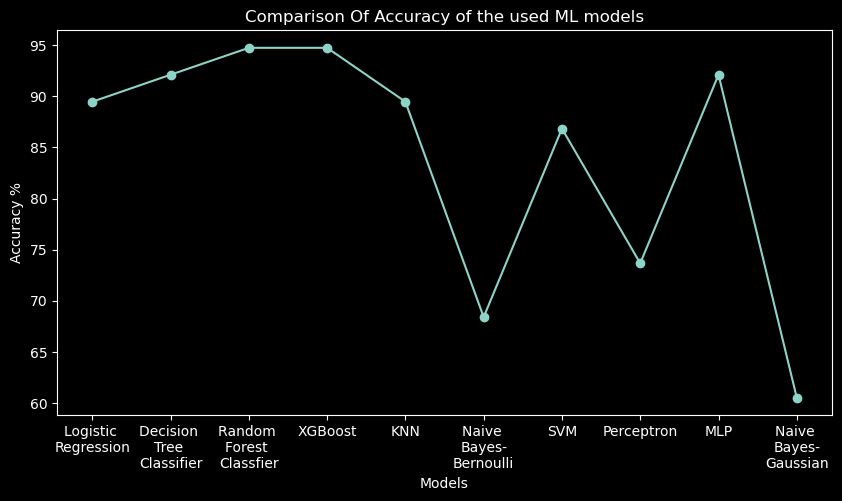

In [134]:
plt.figure(figsize=(10,5))
plt.plot(['Logistic \nRegression','Decision \nTree \nClassifier','Random \nForest \nClassfier',
         'XGBoost','KNN','Naive \nBayes-\nBernoulli','SVM','Perceptron','MLP','Naive \nBayes-\nGaussian'],accuracy_comp, 'o-')
plt.xlabel("Models")
plt.ylabel("Accuracy %")
plt.title("Comparison Of Accuracy of the used ML models")

In [135]:
models= ['Logistic Regression','Decision Tree Classifier','Random Forest Classfier',
         'XGBoost','KNN','Naive Bayes-Bernoulli','SVM','Pereceptron','MLP','Naive \nBayes-\nGaussian']
print('Accuracies of models are:\n')
for i in range(10) :
        print(models[i],':',str(accuracy_comp[i])+'%')

Accuracies of models are:

Logistic Regression : 89.47%
Decision Tree Classifier : 92.11%
Random Forest Classfier : 94.74%
XGBoost : 94.74%
KNN : 89.47%
Naive Bayes-Bernoulli : 68.42%
SVM : 86.84%
Pereceptron : 73.68%
MLP : 92.11%
Naive 
Bayes-
Gaussian : 60.53%


Text(0.5, 1.0, 'Comparison Of Precision of the used ML models')

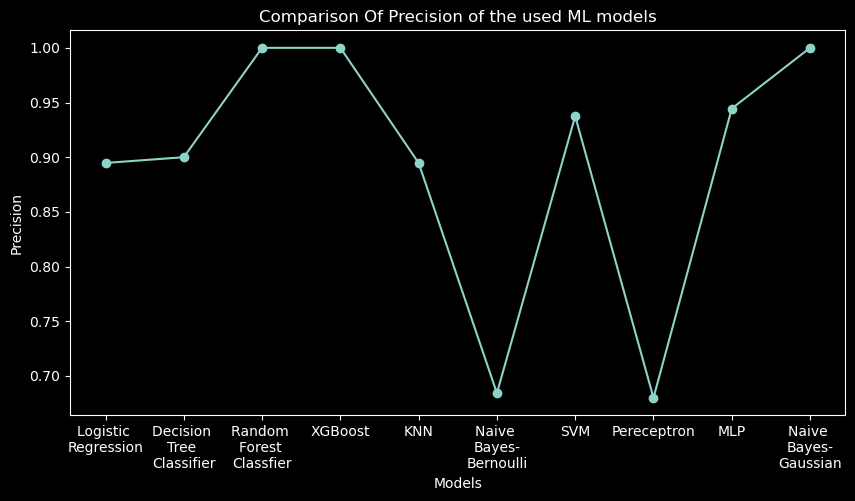

In [136]:
plt.figure(figsize=(10,5))
plt.plot(['Logistic \nRegression','Decision \nTree \nClassifier','Random \nForest \nClassfier',
         'XGBoost','KNN','Naive \nBayes-\nBernoulli','SVM','Pereceptron','MLP','Naive \nBayes-\nGaussian'],precision_comp, 'o-')
plt.xlabel("Models")
plt.ylabel("Precision")
plt.title("Comparison Of Precision of the used ML models")

In [137]:
models= ['Logistic Regression','Decision Tree Classifier','Random Forest Classfier',
         'XGBoost','KNN','Naive Bayes-Bernoulli','SVM','Perceptron','MLP','Naive \nBayes-\nGaussian']
print('Precision of models are:\n')
for i in range(10) :
        print(models[i],':',str(precision_comp[i]))

Precision of models are:

Logistic Regression : 0.8947368421052632
Decision Tree Classifier : 0.9
Random Forest Classfier : 1.0
XGBoost : 1.0
KNN : 0.8947368421052632
Naive Bayes-Bernoulli : 0.6842105263157895
SVM : 0.9375
Perceptron : 0.68
MLP : 0.9444444444444444
Naive 
Bayes-
Gaussian : 1.0


Text(0.5, 1.0, 'Comparison Of Recall of the used ML models')

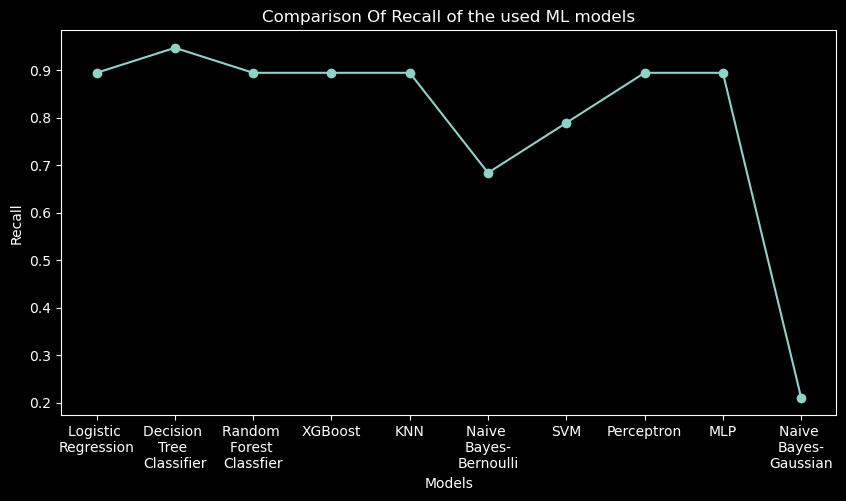

In [138]:
plt.figure(figsize=(10,5))
plt.plot(['Logistic \nRegression','Decision \nTree \nClassifier','Random \nForest \nClassfier',
         'XGBoost','KNN','Naive \nBayes-\nBernoulli','SVM','Perceptron','MLP','Naive \nBayes-\nGaussian'],recall_comp, 'o-')
plt.xlabel("Models")
plt.ylabel("Recall")
plt.title("Comparison Of Recall of the used ML models")

In [139]:
models= ['Logistic Regression','Decision Tree Classifier','Random Forest Classfier',
         'XGBoost','KNN','Naive Bayes-Bernoulli','SVM','Perceptron','MLP','Naive \nBayes-\nGaussian']
print('Recall of models are:\n')
for i in range(10) :
        print(models[i],':',str(recall_comp[i]))

Recall of models are:

Logistic Regression : 0.8947368421052632
Decision Tree Classifier : 0.9473684210526315
Random Forest Classfier : 0.8947368421052632
XGBoost : 0.8947368421052632
KNN : 0.8947368421052632
Naive Bayes-Bernoulli : 0.6842105263157895
SVM : 0.7894736842105263
Perceptron : 0.8947368421052632
MLP : 0.8947368421052632
Naive 
Bayes-
Gaussian : 0.21052631578947367


Text(0.5, 1.0, 'Comparison Of F1-Score of the used ML models')

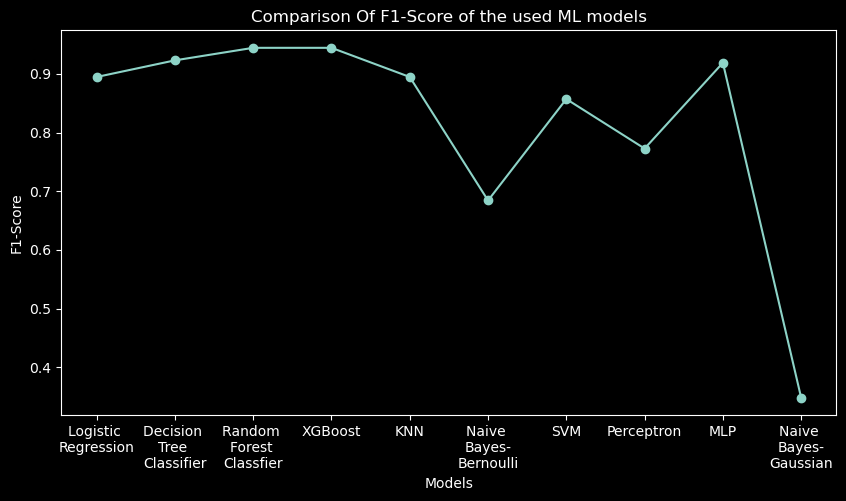

In [140]:
plt.figure(figsize=(10,5))
plt.plot(['Logistic \nRegression','Decision \nTree \nClassifier','Random \nForest \nClassfier',
         'XGBoost','KNN','Naive \nBayes-\nBernoulli','SVM','Perceptron','MLP','Naive \nBayes-\nGaussian'],f1score_comp, 'o-')
plt.xlabel("Models")
plt.ylabel("F1-Score")
plt.title("Comparison Of F1-Score of the used ML models")

In [141]:
models= ['Logistic Regression','Decision Tree Classifier','Random Forest Classfier',
         'XGBoost','KNN','Naive Bayes-Bernoulli','SVM','Perceptron','MLP','Naive \nBayes-\nGaussian']
print('F1-Score of models are:\n')
for i in range(10) :
        print(models[i],':',str(f1score_comp[i]))

F1-Score of models are:

Logistic Regression : 0.8947368421052632
Decision Tree Classifier : 0.9230769230769231
Random Forest Classfier : 0.9444444444444444
XGBoost : 0.9444444444444444
KNN : 0.8947368421052632
Naive Bayes-Bernoulli : 0.6842105263157895
SVM : 0.8571428571428572
Perceptron : 0.7727272727272727
MLP : 0.918918918918919
Naive 
Bayes-
Gaussian : 0.34782608695652173


## 
# END OF PROJECT
## 